1. 계통추출(test set 추출)  
2. 3번 이하, 4번이하 빈도수 단어들로 구분지어 실행해보기 → 단어 몇 개 정도 남길건지 결정
ex. 5000개 가지고 train 했을 경우의 정확도

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
data = pd.read_csv('New_Combined_dataset.csv')
data

C:\Users\user\.conda\envs\gz\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7,8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,발화,감정_str,감정_int,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,1,2,3,Unnamed: 10
0,언니 동생으로 부르는게 맞는 일인가요..??,부정,3,NaN,NaN,NaN,NaN,긍정,중립,부정,Sum
1,그냥 내 느낌일뿐겠지?,부정,3,NaN,NaN,NaN,NaN,행복,중립,공포,NaN
2,아직너무초기라서 그런거죠?,부정,3,NaN,NaN,NaN,NaN,NaN,놀람,분노,NaN
3,유치원버스 사고 낫다던데,부정,3,NaN,NaN,NaN,NaN,NaN,NaN,혐오,NaN
4,근데 원래이런거맞나요,부정,3,NaN,NaN,NaN,NaN,NaN,NaN,슬픔,NaN
...,...,...,...,...,...,...,...,...,...,...,...
94216,얘긴 다 끝났냐? 원예부,중립,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94217,"예. 그거 때문에, 부탁이 있......는......데요.",중립,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94218,여자 숨겨달라는거면 사절이다.,중립,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94219,아무래도 안되나요?,중립,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data2 = data.drop(['감정_str'], axis = 1)
data2

,발화,감정_int,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,1,2,3,Unnamed: 10
0,언니 동생으로 부르는게 맞는 일인가요..??,3,NaN,NaN,NaN,NaN,긍정,중립,부정,Sum
1,그냥 내 느낌일뿐겠지?,3,NaN,NaN,NaN,NaN,행복,중립,공포,NaN
2,아직너무초기라서 그런거죠?,3,NaN,NaN,NaN,NaN,NaN,놀람,분노,NaN
3,유치원버스 사고 낫다던데,3,NaN,NaN,NaN,NaN,NaN,NaN,혐오,NaN
4,근데 원래이런거맞나요,3,NaN,NaN,NaN,NaN,NaN,NaN,슬픔,NaN
...,...,...,...,...,...,...,...,...,...,...
94216,얘긴 다 끝났냐? 원예부,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94217,"예. 그거 때문에, 부탁이 있......는......데요.",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94218,여자 숨겨달라는거면 사절이다.,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94219,아무래도 안되나요?,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data2 = data2[['발화','감정_int']]
data2

,발화,감정_int
0,언니 동생으로 부르는게 맞는 일인가요..??,3
1,그냥 내 느낌일뿐겠지?,3
2,아직너무초기라서 그런거죠?,3
3,유치원버스 사고 낫다던데,3
4,근데 원래이런거맞나요,3
...,...,...
94216,얘긴 다 끝났냐? 원예부,2
94217,"예. 그거 때문에, 부탁이 있......는......데요.",2
94218,여자 숨겨달라는거면 사절이다.,2
94219,아무래도 안되나요?,2


In [5]:
# data2['발화'].nunique(), data2['감정_int'].nunique()

In [6]:
data2.isnull().sum()

발화        0
감정_int    0
dtype: int64

In [7]:
data2.drop_duplicates(subset = ["발화"], inplace = True)
data2

<ipython-input-7-dd2f7b4f3303>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.drop_duplicates(subset = ["발화"], inplace = True)


,발화,감정_int
0,언니 동생으로 부르는게 맞는 일인가요..??,3
1,그냥 내 느낌일뿐겠지?,3
2,아직너무초기라서 그런거죠?,3
3,유치원버스 사고 낫다던데,3
4,근데 원래이런거맞나요,3
...,...,...
94216,얘긴 다 끝났냐? 원예부,2
94217,"예. 그거 때문에, 부탁이 있......는......데요.",2
94218,여자 숨겨달라는거면 사절이다.,2
94219,아무래도 안되나요?,2


In [8]:
data2.isnull().sum()

발화        0
감정_int    0
dtype: int64

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state = 42)

for train_index, test_index in split.split(data2,data2["감정_int"]):
    strat_train_set = data2.loc[train_index]
    strat_test_set = data2.loc[test_index]

In [9]:
from sklearn.model_selection import train_test_split
grp = [0,1]
train1, train2 = train_test_split(data2, test_size=0.25, random_state=0)

In [10]:
train1['발화'] = train1['발화'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train2['발화'] = train2['발화'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

<ipython-input-10-94f5e7172e7d>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train1['발화'] = train1['발화'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
<ipython-input-10-94f5e7172e7d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1['발화'] = train1['발화'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
<ipython-input-10-94f5e7172e7d>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train2['발화'] = train2['발화'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
<ipython-input-10-94f5e7172e7d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [11]:
train1['발화'] = train1['발화'].str.replace('^ +', "")
train2['발화'] = train2['발화'].str.replace('^ +', "")
train1['발화'].replace('', np.nan, inplace = True)
train2['발화'].replace('', np.nan, inplace = True)
print(train1.isnull().sum())
print(train2.isnull().sum())

<ipython-input-11-4ae6611874fe>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train1['발화'] = train1['발화'].str.replace('^ +', "")


발화        4
감정_int    0
dtype: int64
발화        6
감정_int    0
dtype: int64


<ipython-input-11-4ae6611874fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1['발화'] = train1['발화'].str.replace('^ +', "")
<ipython-input-11-4ae6611874fe>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train2['발화'] = train2['발화'].str.replace('^ +', "")
<ipython-input-11-4ae6611874fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['발화'] = train2['발화'].str.replace('^ +', "")
C:\Users\user\.conda\envs\gz\lib\site-packages\pandas\core\series.

In [12]:
train1.loc[train1.발화.isnull()][:10]
train2.loc[train2.발화.isnull()][:10]
train1 = train1.dropna()
train2 = train2.dropna()

In [13]:
print(train1.isnull().sum())
print(train2.isnull().sum())

발화        0
감정_int    0
dtype: int64
발화        0
감정_int    0
dtype: int64


In [14]:
stopwords = ['의','가','이','은','들','는','좀','잘','을','걍','과','도','를','으로','자','에','와','한','하다']
okt = Okt()
okt.morphs('와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔', stem = True)

['오다', '이렇다', '것', '도', '영화', '라고', '차라리', '뮤직비디오', '를', '만들다', '게', '나다', '뻔']

In [15]:
# 제대로 나누기

t_train1 = [] # 75%
t_train2 = [] # 25%
for sentence in train1['발화']:
    temp_X = okt.morphs(sentence, stem = True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    t_train1.append(temp_X)
    
for sentence in train2['발화']:
    temp_X = okt.morphs(sentence, stem = True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    t_train2.append(temp_X)

In [16]:
import nltk
nltk.download('punkt')
nltk.download('treebank')

from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import TreebankWordTokenizer

tb_tokenizer = TreebankWordTokenizer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!


In [17]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(t_train1)
tokenizer.fit_on_texts(t_train2)

In [18]:
threshold = 4
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt) * 100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq) * 100)

단어 집합(vocabulary)의 크기 : 28020
등장 빈도가 3번 이하인 희귀 단어의 수: 17789
단어 집합에서 희귀 단어의 비율: 63.48679514632405
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.8359345378688072


In [19]:
# 전체 단어 개수 중 빈도수 n 이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :', vocab_size)

단어 집합의 크기 : 10232


# 빈도수 높은 단어 확인

# 알고리즘 수정 전 수정

In [20]:
t_train11 = tokenizer.texts_to_sequences(t_train1)
t_train22 = tokenizer.texts_to_sequences(t_train2)

In [21]:
emo1 = train1['감정_int']
emo2 = train2['감정_int']

문장의 최대 길이 : 112
문장의 평균 길이 : 7.573795583558712


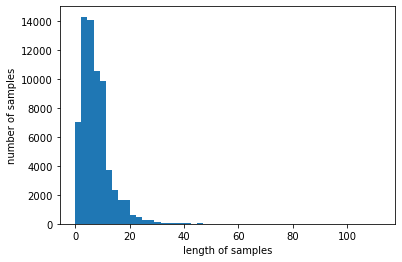

In [22]:
print('문장의 최대 길이 :',max(len(l) for l in t_train11))
print('문장의 평균 길이 :',sum(map(len, t_train11))/len(t_train11))
plt.hist([len(s) for s in t_train11], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [23]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [24]:
max_len = 17
below_threshold_len(max_len, t_train11)

전체 샘플 중 길이가 17 이하인 샘플의 비율: 94.49282253989955


In [25]:
t_train111 = pad_sequences(t_train11, maxlen = max_len)
# t_train11, t_train22 = tokenizer.texts_to_sequences
t_train222 = pad_sequences(t_train22, maxlen = max_len)

In [26]:
if True in np.isnan(t_train222):
    print(1)
else:
    print(2)

2


In [27]:
from keras import models
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [28]:
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

enc = LabelEncoder()
enc.fit(emo1)
emo1_label = enc.transform(emo1)
print(emo1_label)

enc.fit(emo2)
emo2_label = enc.transform(emo2)
print(emo2_label)

[1 2 2 ... 1 2 1]
[1 1 2 ... 1 1 1]


In [29]:
emo1_enc = tf.keras.utils.to_categorical(emo1_label)
emo2_enc = tf.keras.utils.to_categorical(emo2_label)

In [30]:
t_train111[0]

array([   0,    0,    0,    0,  192,   21,   69, 4350, 3275,    5, 1663,
       1741, 4350,  497,    3, 1421,  785])

In [31]:
print(emo1_label.shape, emo2_enc.shape)
print(t_train111.shape,emo1_enc.shape)

(67294,) (22427, 3)
(67294, 17) (67294, 3)


In [32]:
t_train222.shape

(22427, 17)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import os 
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
model = Sequential()
model.add(Embedding(total_cnt, 10))
model.add(LSTM(128))
#model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
#model.add(Dense(64, activation='relu'))
#model.add(Dense(32, activation='relu'))
#model.add(Dense(64, activation='relu'))
#model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3,activation = 'softmax'))



MODEL_DIR = './model_sequence_data/'
if not os.path.exists(MODEL_DIR): 
    os.mkdir(MODEL_DIR)

modelpath = MODEL_DIR + "{epoch:02d}-{val_loss:.4f}.hdf5"

#checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

#early_stopping_callback = EarlyStopping(monitor='val_loss', patience=50)
    
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
#model.fit(t_train111, emo1_enc, epochs=50, batch_size = 100)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=7)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(t_train111, emo1_enc, epochs=5, callbacks=[es, mc], batch_size=1000, validation_split=0.2) # callbacks=[es, mc] 삭제함

print(model.evaluate(t_train111,emo1_enc))

Epoch 1/5
54/54 [==============================] - 12s 178ms/step - loss: 0.9022 - accuracy: 0.6069 - val_loss: 0.8381 - val_accuracy: 0.6159
Epoch 2/5
54/54 [==============================] - 9s 172ms/step - loss: 0.7754 - accuracy: 0.6330 - val_loss: 0.7293 - val_accuracy: 0.6759
Epoch 3/5
54/54 [==============================] - 10s 187ms/step - loss: 0.6644 - accuracy: 0.7136 - val_loss: 0.7005 - val_accuracy: 0.6980
Epoch 4/5
54/54 [==============================] - 10s 186ms/step - loss: 0.5730 - accuracy: 0.7675 - val_loss: 0.6721 - val_accuracy: 0.7071
Epoch 5/5
2103/2103 [==============================] - 7s 3ms/step - loss: 0.4707 - accuracy: 0.8206
[0.47067317366600037, 0.8205634951591492]


In [34]:
print(t_train222.shape, emo2_enc.shape)

(22427, 17) (22427, 3)


In [35]:
print(model.evaluate(t_train222,emo2_enc)[1])

690/701 [============================>.] - ETA: 0s - loss: 0.6709 - accuracy: 0.7204

InvalidArgumentError:  indices[23,15] = 28020 is not in [0, 28020)
	 [[node sequential/embedding/embedding_lookup (defined at <ipython-input-33-ed0f8a6da5fc>:37) ]] [Op:__inference_test_function_4060]

Errors may have originated from an input operation.
Input Source operations connected to node sequential/embedding/embedding_lookup:
 sequential/embedding/embedding_lookup/3508 (defined at C:\Users\user\.conda\envs\gz\lib\contextlib.py:113)

Function call stack:
test_function


In [36]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(t_train222, emo2_enc)[1]))

ValueError: in user code:

    C:\Users\user\.conda\envs\gz\lib\site-packages\tensorflow\python\keras\engine\training.py:1323 test_function  *
        return step_function(self, iterator)
    C:\Users\user\.conda\envs\gz\lib\site-packages\tensorflow\python\keras\engine\training.py:1314 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\user\.conda\envs\gz\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\user\.conda\envs\gz\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\user\.conda\envs\gz\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\user\.conda\envs\gz\lib\site-packages\tensorflow\python\keras\engine\training.py:1307 run_step  **
        outputs = model.test_step(data)
    C:\Users\user\.conda\envs\gz\lib\site-packages\tensorflow\python\keras\engine\training.py:1268 test_step
        self.compiled_loss(
    C:\Users\user\.conda\envs\gz\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\user\.conda\envs\gz\lib\site-packages\tensorflow\python\keras\losses.py:155 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\user\.conda\envs\gz\lib\site-packages\tensorflow\python\keras\losses.py:259 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\user\.conda\envs\gz\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\user\.conda\envs\gz\lib\site-packages\tensorflow\python\keras\losses.py:1754 binary_crossentropy
        backend.binary_crossentropy(
    C:\Users\user\.conda\envs\gz\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\user\.conda\envs\gz\lib\site-packages\tensorflow\python\keras\backend.py:5023 binary_crossentropy
        return nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)
    C:\Users\user\.conda\envs\gz\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\user\.conda\envs\gz\lib\site-packages\tensorflow\python\ops\nn_impl.py:132 sigmoid_cross_entropy_with_logits
        raise ValueError("logits and labels must have the same shape (%s vs %s)" %

    ValueError: logits and labels must have the same shape ((None, 7) vs (None, 3))


model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(7,activation = 'softmax'))

# 모델 저장
import os
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

MODEL_DIR = './model_sequence_data/'
if not os.path.exists(MODEL_DIR):
   os.mkdir(MODEL_DIR)

modelpath = MODEL_DIR + "{epoch:02d}-{val_loss:.4f}.hdf5"

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=50)

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3500, 
                    batch_size=10, verbose=0, 
                    callbacks=[early_stopping_callback,checkpointer])

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [37]:
loaded_model = models.load_model('best_model.h5')

def sentiment_predict(new_sentence):
    new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
    new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
    encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
    print(pad_new)
    pred = loaded_model.predict(pad_new)
    print(np.argmax(pred))

In [38]:
print('1:행복, 2:중립, 3:부정.\n')
sentiment_predict('아플수도')

1:행복, 2:중립, 3:부정.

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 178]]
5


print(t_train1[3731])
print(t_train111[3731])
print(emo1[3731])